In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# 2-D Discrete Wavelet Transform

In [2]:
%pylab inline
import cv2
import pywt # PyWavelets

Populating the interactive namespace from numpy and matplotlib


## Load image

In [3]:
image = cv2.imread('grasshopper.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (1024, 1024))

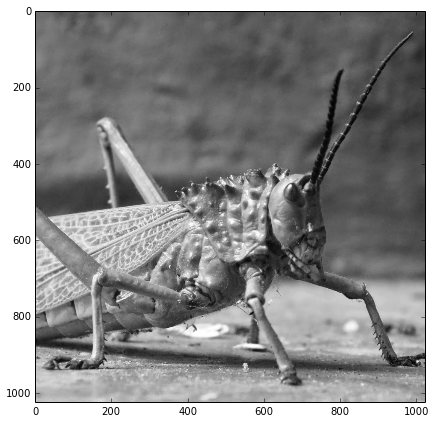

In [4]:
figure(figsize(7,7))
plt.imshow(image, 'gray');

## Using single level DWT2

### First level

In [5]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(image, 'haar')
cA1.shape, cH1.shape, cV1.shape, cD1.shape

((512, 512), (512, 512), (512, 512), (512, 512))

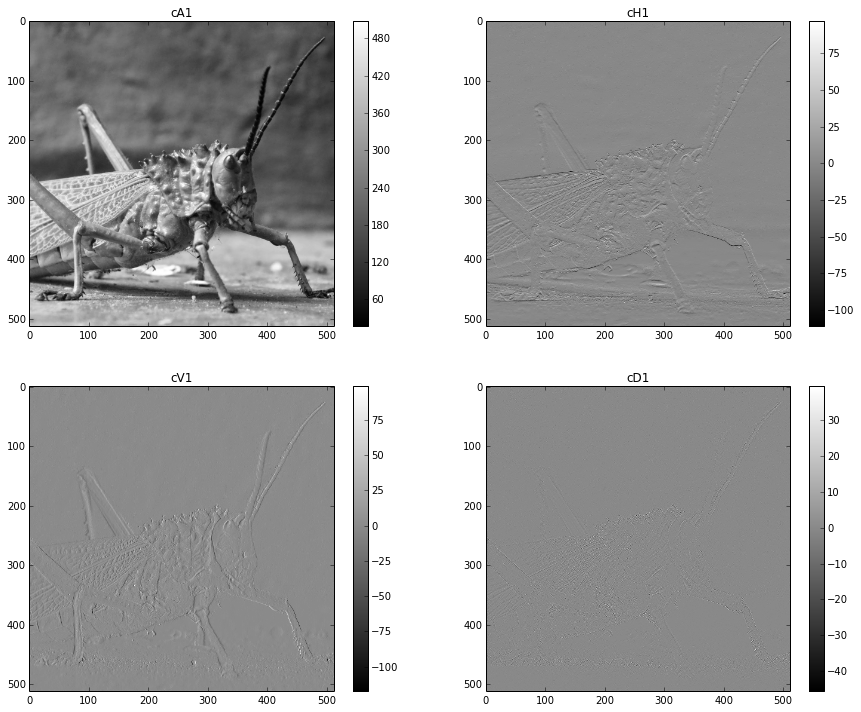

In [6]:
figure(figsize(15,12))
images = ['cA1', 'cH1', 'cV1', 'cD1']
for i, image_name in enumerate(images):
    img = locals()[image_name]
    plt.subplot(2, 2, i+1)    
    plt.imshow(img, 'gray'), plt.colorbar()
    plt.title(image_name)

### Second level

In [7]:
cA2, (cH2, cV2, cD2) = pywt.dwt2(cA1, 'haar')
cA2.shape, cH2.shape, cV2.shape, cD2.shape

((256, 256), (256, 256), (256, 256), (256, 256))

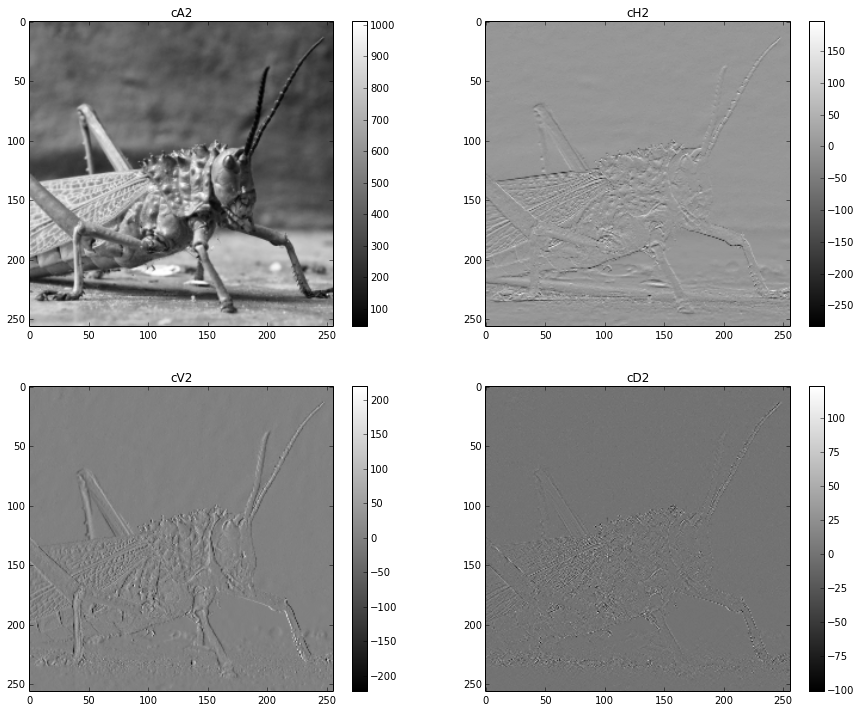

In [8]:
figure(figsize(15,12))
images = ['cA2', 'cH2', 'cV2', 'cD2']
for i, image_name in enumerate(images):
    img = locals()[image_name]
    plt.subplot(2, 2, i+1)    
    plt.imshow(img, 'gray'), plt.colorbar()
    plt.title(image_name)

### Third level

In [9]:
cA3, (cH3, cV3, cD3) = pywt.dwt2(cA2, 'haar')
cA3.shape, cH3.shape, cV3.shape, cD3.shape

((128, 128), (128, 128), (128, 128), (128, 128))

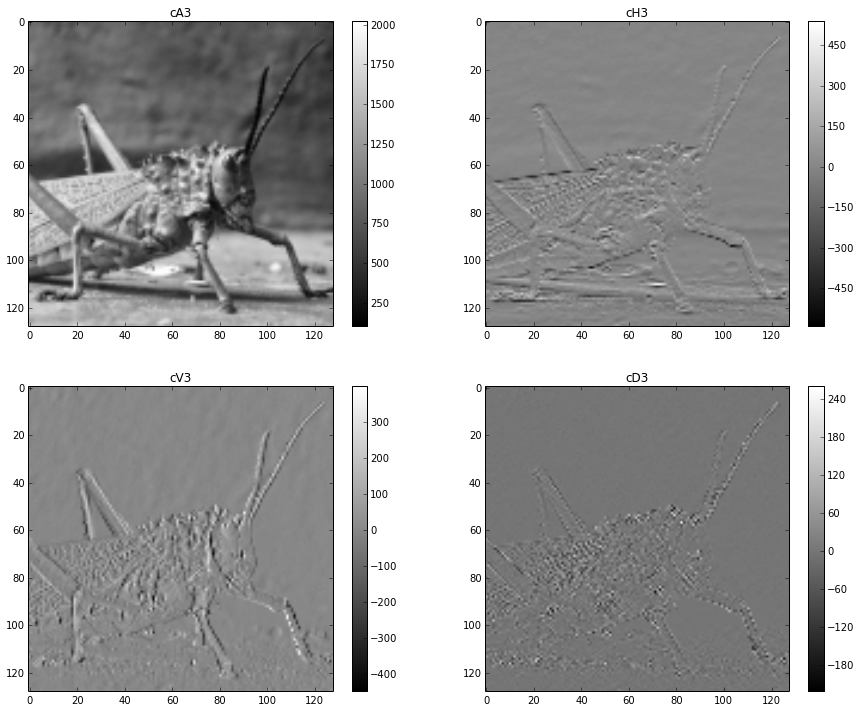

In [10]:
figure(figsize(15,12))
images = ['cA3', 'cH3', 'cV3', 'cD3']
for i, image_name in enumerate(images):
    img = locals()[image_name]
    plt.subplot(2, 2, i+1)    
    plt.imshow(img, 'gray'), plt.colorbar()
    plt.title(image_name)

### Fourth level

In [11]:
cA4, (cH4, cV4, cD4) = pywt.dwt2(cA3, 'haar')
cA4.shape, cH4.shape, cV4.shape, cD4.shape

((64, 64), (64, 64), (64, 64), (64, 64))

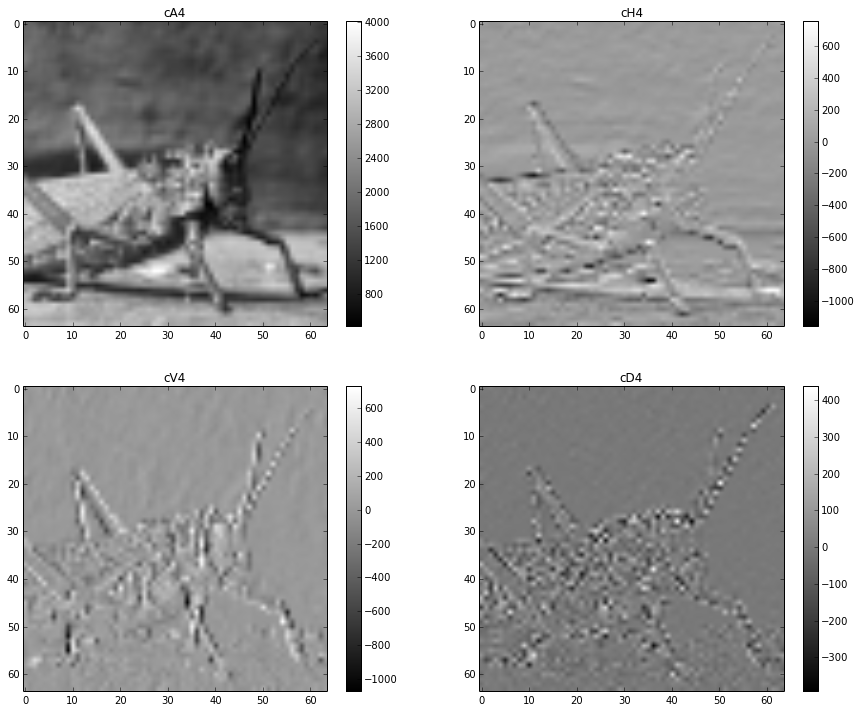

In [12]:
figure(figsize(15,12))
images = ['cA4', 'cH4', 'cV4', 'cD4']
for i, image_name in enumerate(images):
    img = locals()[image_name]
    plt.subplot(2, 2, i+1)    
    plt.imshow(img, 'gray'), plt.colorbar()
    plt.title(image_name)

### Reconstruction

In [13]:
recon1 = pywt.idwt2((cA4, (cH4, cV4, cD4)), 'haar')
recon2 = pywt.idwt2((recon1, (cH3, cV3, cD3)), 'haar')
recon3 = pywt.idwt2((recon2, (cH2, cV2, cD2)), 'haar')
recon4 = pywt.idwt2((recon3, (cH1, cV1, cD1)), 'haar')

In [14]:
diff = image - recon4

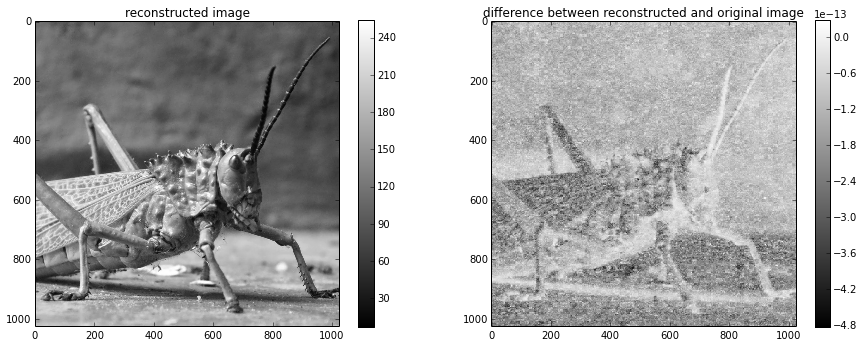

In [15]:
figure(figsize(15,5.5))
plt.subplot(1,2,1), plt.imshow(recon4, 'gray'), plt.colorbar()
plt.title('reconstructed image')
plt.subplot(1,2,2), plt.imshow(diff, 'gray'), plt.colorbar()
plt.title('difference between reconstructed and original image');

## Using 2-D multi-level decomposition and reconstruction

In [16]:
coeffs = pywt.wavedec2(image, 'haar', level=2)
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs

In [17]:
recon = pywt.waverec2(coeffs, 'haar')